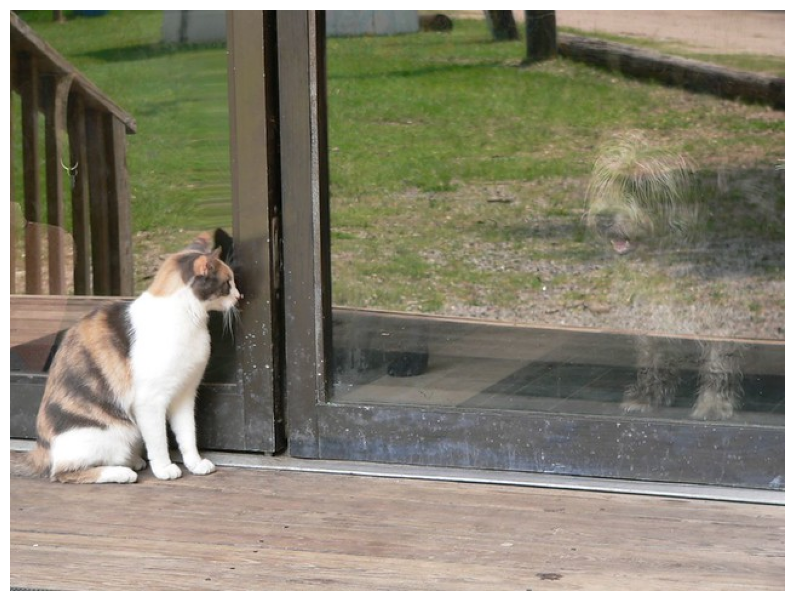

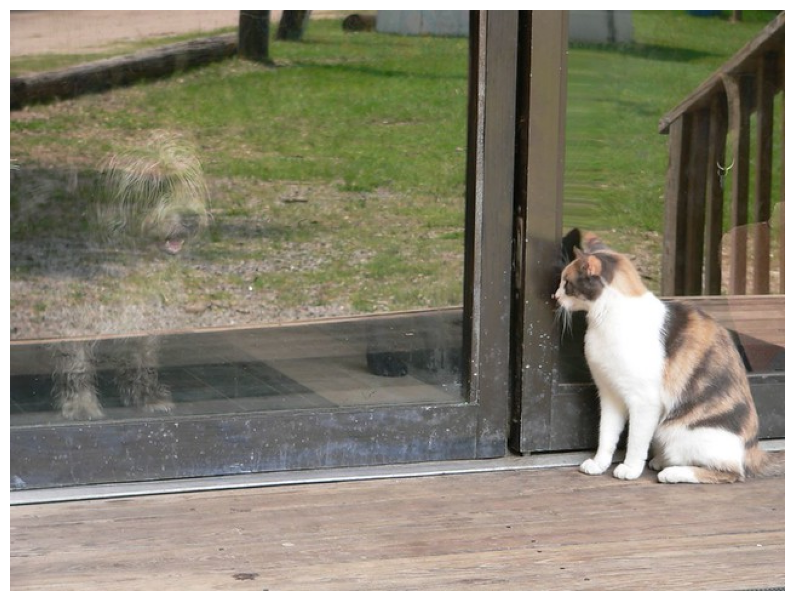

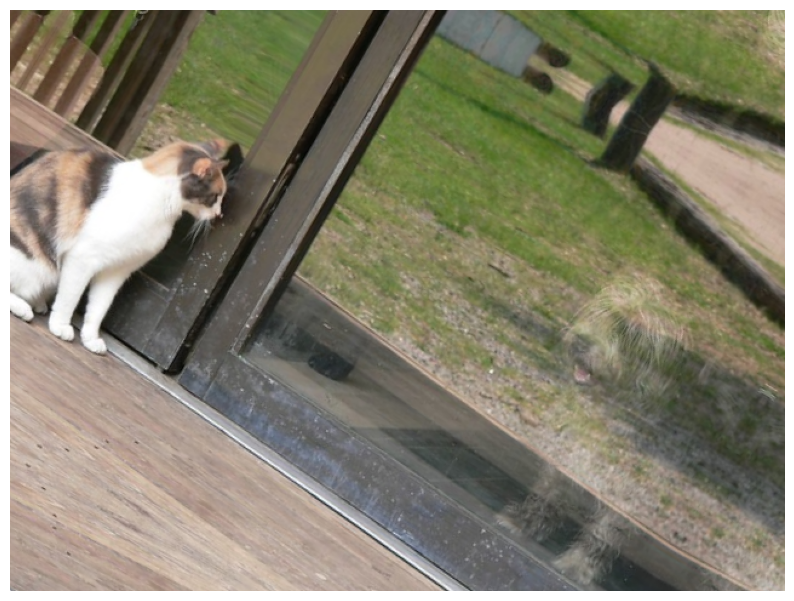

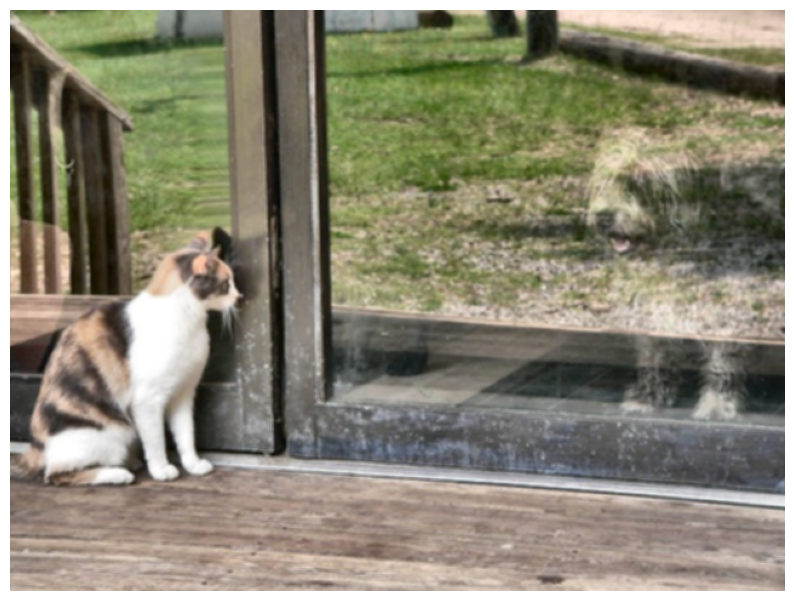

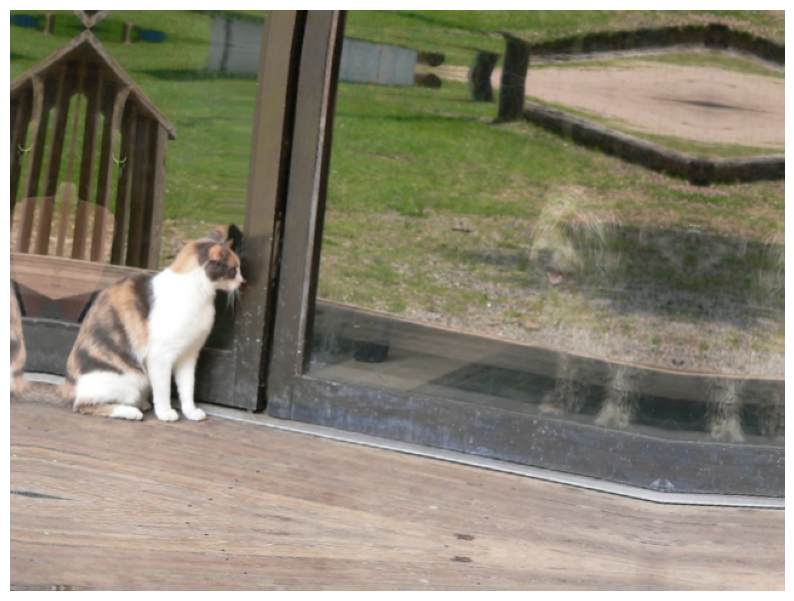

In [3]:
import random
import cv2
import albumentations as A
from matplotlib import pyplot as plt

#

def visualize(image):
    plt.figure(figsize=(10, 10))
    plt.axis('off')
    plt.imshow(image)
    
#
    
image = cv2.imread('./data/cat_dog.jpeg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

visualize(image)

#

transform = A.HorizontalFlip(p=0.5)

random.seed(7)

augmented_image = transform(image=image)['image']

visualize(augmented_image)

#

transform = A.ShiftScaleRotate(p=0.5)

random.seed(7)

augmented_image = transform(image=image)['image']

visualize(augmented_image)

#

transform = A.Compose([
    A.CLAHE(),
    A.RandomRotate90(),
    A.Transpose(),
    A.ShiftScaleRotate(shift_limit=0.0625, scale_limit=0.50, rotate_limit=45, p=.75),
    A.Blur(blur_limit=3),
    A.OpticalDistortion(),
    A.GridDistortion(),
    A.HueSaturationValue()
])

random.seed(42)

augmented_image = transform(image=image)['image']

visualize(augmented_image)

#

transform = A.Compose([
    A.RandomRotate90(),
    A.Flip(),
    A.Transpose(),
    A.OneOf([
        A.IAAAdditiveGaussianNoise(),
        A.GaussNoise()
    ], p=0.2),
    A.OneOf([
        A.MotionBlur(p=0.2),
        A.MedianBlur(blur_limit=3, p=0.1),
        A.Blur(blur_limit=3, p=0.1)
    ], p=0.2),
    A.ShiftScaleRotate(shift_limit=0.0625, scale_limit=0.2, rotate_limit=45, p=0.2),
    A.OneOf([
        A.OpticalDistortion(p=0.3),
        A.GridDistortion(p=0.1),
        A.IAAPiecewiseAffine(p=0.3)
    ], p=0.2),
    A.OneOf([
        A.CLAHE(clip_limit=2),
        A.IAASharpen(),
        A.IAAEmboss(),
        A.RandomBrightnessContrast()
    ], p=0.3),
    A.HueSaturationValue(p=0.3)
])

random.seed(42)

augmented_image = transform(image=image)['image']

visualize(augmented_image)